In [18]:
#Acknowedgement: most of the code chunks below are built upon those provided in 0007 Quantitative Method practicals

In [17]:
# Importing libraries and data
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

data_filename = 'coursework_1_data_2019.csv'
data = pd.read_csv(data_filename)

In [2]:
#a Data preparation

#data.columns
'''
['local_authority_area', '2008_cases_total', '2013_cases_total',
       '2018_cases_total', '2008_pop_total', '2013_pop_total',
       '2018_pop_total', '2008_cases_male', '2013_cases_male',
       '2018_cases_male', '2008_pop_male', '2013_pop_male', '2018_pop_male',
       '2008_cases_female', '2013_cases_female', '2018_cases_female',
       '2008_pop_female', '2013_pop_female', '2018_pop_female', 'total_budget',
       'clean_air', 'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling', 'region', 'local_authority_type']
'''
#data.describe() -> no N/A data

#correcting for total population and total funding to give % data
data_perc = {
    'area': data['local_authority_area'],
    '2008_tot_norm': data['2008_cases_total']/data['2008_pop_total']*100,
    '2013_tot_norm': data['2013_cases_total']/data['2013_pop_total']*100,
    '2018_tot_norm': data['2018_cases_total']/data['2018_pop_total']*100,
    'change_norm': data['2018_cases_total']/data['2018_pop_total']*100 - data['2008_cases_total']/data['2008_pop_total']*100,
    'clean_air_norm': data['clean_air']/data['2013_pop_total']*100,
    'clean_environ_norm': data['clean_environ']/data['2013_pop_total']*100,
    'health_training_norm': data['health_training']/data['2013_pop_total']*100,
    'school_awareness_norm': data['school_awareness']/data['2013_pop_total']*100,
    'media_awareness_norm': data['media_awareness']/data['2013_pop_total']*100,
    'sub_counselling_norm': data['sub_counselling']/data['2013_pop_total']*100,
    'total_budget_norm': data['total_budget']/data['2013_pop_total']
}

#Converting to a pandas dataframe and making area name a the index
data_pd = pd.DataFrame(data=data_perc)
data_pd.set_index('area')
data_pd.describe()

,2008_tot_norm,2013_tot_norm,2018_tot_norm,change_norm,clean_air_norm,clean_environ_norm,health_training_norm,school_awareness_norm,media_awareness_norm,sub_counselling_norm,total_budget_norm
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.309725,0.320978,0.344673,0.034948,17.431651,19.756157,7.671252,19.775150,9.459184,6.091692,0.801851
std,0.137058,0.139096,0.138712,0.025197,11.057800,9.710955,5.508473,17.237522,4.322202,2.655936,0.361622
min,0.074004,0.041929,0.101388,-0.063338,0.000000,0.000000,0.000000,0.467693,0.000000,0.000000,0.613481
25%,0.214841,0.226886,0.253539,0.017688,12.439247,13.472465,4.940024,13.789579,6.019620,4.085771,0.713571
50%,0.291452,0.298483,0.318207,0.031374,16.865624,19.869929,7.366785,17.724709,9.370722,5.956377,0.766404
75%,0.365028,0.381066,0.406704,0.050573,21.165656,24.702398,9.485022,22.425330,12.322016,7.658504,0.825567
max,0.824132,0.849613,0.872881,0.101448,121.976011,91.482009,60.988006,203.293352,22.597692,18.340670,5.082334


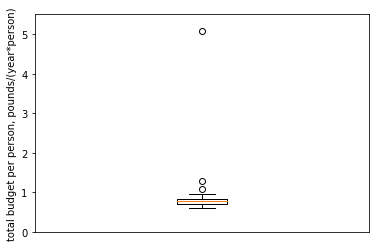

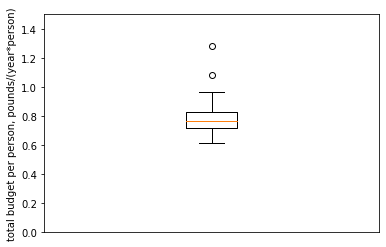

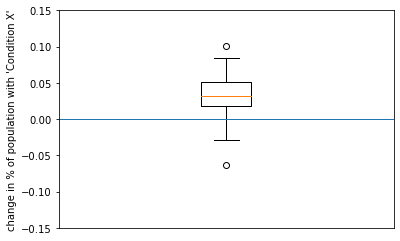

In [3]:
#b Data exploration
y_range = [0, 1]
y_range_change = [-0.15, 0.15]
y_range_budget = [0,5.5]
y_range_budget_rm = [0,1.5]

#boxplot for %cases
'''
plt.figure(1)
plt.boxplot(data_pd['2008_tot_norm']) #-> seems to be a few with high obesidy %
plt.ylim(y_range)
plt.ylabel("% of population with 'Condition X'")
plt.savefig('boxplot_2008.jpg')

plt.figure(2)
plt.boxplot(data_pd['2013_tot_norm'])
plt.ylim(y_range)
plt.ylabel("% of population with 'Condition X'")
plt.savefig('boxplot_2013.jpg')

plt.figure(3)
plt.boxplot(data_pd['2018_tot_norm'])
plt.ylim(y_range)
plt.ylabel("% of population with 'Condition X'")
plt.savefig('boxplot_2018.jpg')

plt.figure(4)
plt.boxplot(data_pd['change_norm'])
plt.ylim(y_range_change)
plt.ylabel("change in % of population with 'Condition X'")
plt.savefig('boxplot_change.jpg')
plt.axhline(linewidth=1)
'''

plt.figure(5)
plt.boxplot(data_pd['total_budget_norm'])
plt.ylabel("total budget per person, pounds/(year*person)")
plt.ylim(y_range_budget)
plt.xticks([])
plt.savefig('boxplot_budget.jpg')

data_pd_rm = data_pd[data_pd['total_budget_norm']<200]

plt.figure(6)
plt.boxplot(data_pd_rm['total_budget_norm'])
plt.ylabel("total budget per person, pounds/(year*person)")
plt.ylim(y_range_budget_rm)
plt.xticks([])
plt.savefig('boxplot_budget_rm.jpg')

plt.figure(7)
plt.boxplot(data_pd_rm['change_norm'])
plt.ylim(y_range_change)
plt.ylabel("change in % of population with 'Condition X'")
plt.xticks([])
plt.axhline(linewidth=1)
plt.savefig('boxplot_change_rm.jpg')

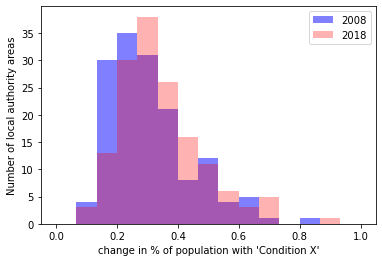

In [4]:
#c Trend in the prevalence of ‘Condition X’ from 2008 to 2018 
#hitogram

#histogram to check distribution
x_range = [0, 1]
plt.figure(8)
plt.hist(data_pd['2008_tot_norm'], range=x_range, bins=15, color='b', alpha = 0.5,label="2008")
#plt.hist(data_pd['2013_tot_norm'], range=x_range, bins=15, color='g', alpha=0.4,label="2013")
plt.hist(data_pd['2018_tot_norm'], range=x_range, bins=15, color='r', alpha=0.3,label="2018")
plt.xlabel("change in % of population with 'Condition X'")
plt.ylabel("Number of local authority areas")
plt.legend()
plt.savefig('hitogram_change.jpg')

In [5]:
#c Trend in the prevalence of ‘Condition X’ from 2008 to 2018 
#KS hypothesis test

alpha = 0.05 
KS_stat, p_value = sps.ks_2samp(data_pd_rm['2008_tot_norm'],data_pd_rm['2018_tot_norm'])
print("KS stat =", KS_stat)
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

KS stat = 0.17105263157894737
p-value = 0.02325225501139328
p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different distributions.


In [6]:
#d Impact of each intervention area - multiple regression
#VIF

# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
def drop_column_using_vif_(df, thresh=10):
    while True:
        # adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

data_pd_VIF = drop_column_using_vif_(data_pd_rm.drop('area', axis=1).drop('total_budget_norm', axis=1).drop('2008_tot_norm', axis=1).drop('2013_tot_norm', axis=1).drop('2018_tot_norm', axis=1).drop('change_norm', axis=1))
data_pd_VIF.columns

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Index(['clean_air_norm', 'clean_environ_norm', 'health_training_norm',
       'school_awareness_norm', 'media_awareness_norm',
       'sub_counselling_norm'],
      dtype='object')

In [15]:
#d Impact of each intervention area - multiple regression
#regression analysis

#data_pd_VIF_p = data_pd_VIF[['school_awareness_norm', 'media_awareness_norm']]

regression_result = sm.OLS(endog=data_pd_rm[['change_norm']], exog=sm.add_constant(data_pd_VIF)).fit()
#regression_result = sm.OLS(endog=data_pd_rm[['change_norm']], 
#                           exog=sm.add_constant(data_pd_VIF_p)).fit()
regression_result.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            change_norm   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     4.758
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           0.000186
Time:                        22:52:49   Log-Likelihood:                 358.00
No. Observations:                 152   AIC:                            -702.0
Df Residuals:                     145   BIC:                            -680.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0154      0.007      2.155      0.033       0.001       0.030
clean_air_norm        -8.345e-05      0.000     -0.355      0.723      -0.001       0.000
clean_environ_norm        0.0004      0.000      1.735      0.085   -5.45e-05       0.001
health_training_norm      0.0002      0.001      0.319      0.750      -0.001       0.001
school_awareness_norm    -0.0005      0.000     -2.996      0.003      -0.001      -0.000
media_awareness_norm      0.0016      0.000      3.465      0.001       0.001       0.002
sub_counselling_norm      0.0010      0.001      1.421      0.157      -0.000       0.003
==============================================================================
Omnibus:                        1.917   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.812
Skew:                           0.177   Prob(JB):                        0.404
Kurtosis:                       2.600   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

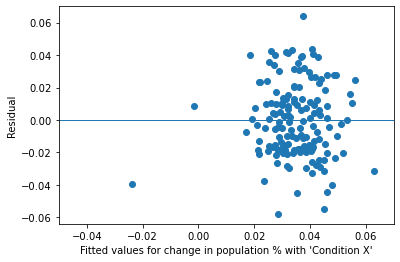

In [16]:
#d Impact of each intervention area - multiple regression
#residual analysis

x_range_resid = [-0.05, 0.07]

plt.figure(9)
plt.scatter(regression_result.fittedvalues, regression_result.resid)
plt.xlabel("Fitted values for change in population % with 'Condition X'")
plt.ylabel("Residual")
plt.xlim(x_range_resid)
plt.axhline(linewidth=1)
plt.savefig('scatter_residual.jpg')